# Logistic Regression Tutorial
---
According to [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression), logistic regression is widely used for binary classification (in economics, discrete choice). Logistic regression was developed by statistician David Cox in 1958. The binary logistic model is used to estimate the probability of a binary response based on one or more predictor (or independent) variables (features). It allows one to say that the presence of a risk factor increases the odds of a given outcome by a specific factor.

## Import packages
---
Import packages to make most of the third-party functions work. 

In [1]:
# set matplotlib output will show in notebook
%matplotlib inline

import matplotlib.pyplot as plt

# import basic package
import numpy as np
import math

In [2]:
# load sklearn iris dataset
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data  
Y = iris.target
# bridge sklearn dataset to our simple implementation
# pull out only one label

dataset=[]

target_label=2 # choose a flower type to generate data that whether is this type of flower or not
for idx,x in enumerate(X):
    transform_label=None
    if Y[idx]==target_label:
        transform_label=1 # is this flower type
    else:
        transform_label=0 # is not this flower type

    x=np.array([x[0],x[2]])
    dataset.append((x,transform_label))
    
dataset=np.array(dataset)

Let us see how this data perform by plotting on a 2D canvas: you can see our manually picked attributes for determining which type of iris is whether linear separatable or not.

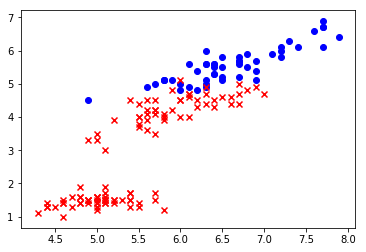

In [3]:
# show current dataset distribution
plt.scatter([v[0][0] for v in dataset if v[1]==1],[v[0][1] for v in dataset if v[1]==1],c="b",marker="o")
plt.scatter([v[0][0] for v in dataset if v[1]==0],[v[0][1] for v in dataset if v[1]==0],c="r",marker="x")
plt.show()

In [4]:
from sklearn.metrics import accuracy_score
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression()
X = np.array([v[0] for v in dataset])
Y = np.array([v[1] for v in dataset])
w= logreg.fit(X,Y).coef_[0]

[-2.23750394  3.20333361]


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # this line will be blank

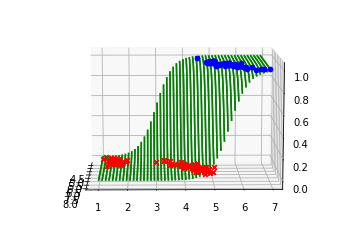

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

# show result

ps = [v[0] for v in dataset]
label = [v[1] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

# plot via label
tpx=[]
tpy=[]

def init():
    for idx,Label in enumerate(label):
        px=ps[idx][0]
        py=ps[idx][1]
        tpx.append(px)
        tpy.append(py)
        if Label==1:
            ax1.scatter(px, py,1, c='b', marker="o", label='O')
        else:
            ax1.scatter(px, py,0, c='r', marker="x", label='X')


    x = np.linspace(min(tpx),max(tpx))
    y = np.linspace(min(tpy),max(tpy))
   
    for one_y in y:
        
        one_y = [one_y]* len(x)
        one_y = np.array(one_y)
        ax1.plot(x, one_y, sigmoid(w[0] * x + w[1] * one_y), 'g-')

    return fig



def animate(i):
    ax1.view_init(elev=10., azim=i)
    return fig

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20)

HTML(anim.to_html5_video())

